In [1]:
import os
import requests
import torch
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from torch.nn import functional as F

In [2]:
!pip install nltk pycocotools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 427.8/427.8 kB 8.7 MB/s eta 0:00:00


In [3]:
import nltk
# from pycocotools.coco import COCO

In [4]:
!pip install --upgrade -q accelerate bitsandbytes

In [5]:
!pip install git+https://github.com/huggingface/transformers.git

  Cloning https://github.com/huggingface/transformers.git to /tmp/pip-req-build-vsdzi0o5
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers.git /tmp/pip-req-build-vsdzi0o5
  Resolved https://github.com/huggingface/transformers.git to commit fc269f77da72d4c65b2e71e6d4896cd16c6f1e76
  Installing build dependencies ... - \ | / done
  Getting requirements to build wheel ... - \ done
  Preparing metadata (pyproject.toml) ... - \ done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 32.8 MB/s eta 0:00:00
  Created wheel for transformers: filename=transformers-4.49.0.dev0-py3-none-any.whl size=10545344 sha256=003d4f13482b5cdf63a8b9bce5f2cc27b79058910db4df59edd944c649d16055
  Stored in directory: /tmp/pip-ephem-wheel-cache-ovd4vv84/wheels/e7/9c/5b/e1a9c8007c343041e61cc484433d512ea9274272e3fcbe7c16
Successfully built transformers
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.20.0
    Uninsta

In [6]:
# read image data
image_path = "/kaggle/input/mini-coco2014-dataset-for-image-captioning/Images/"
image_files = os.listdir(image_path)
print(len(image_files), image_files[0])

18783 COCO_train2014_000000487632.jpg


In [7]:
def get_one_image(idx=-1,image_files=image_files, image_path="/kaggle/input/mini-coco2014-dataset-for-image-captioning/Images/"):
    data_size = len(image_files)
    if idx < 0 or idx >= data_size:
        idx = random.randint(1, data_size)-1
    print(f"choose index {idx} from total {data_size} images")
    img_path = image_path + image_files[idx]
    print(img_path)
    return img_path



choose index 14616 from total 18783 images
/kaggle/input/mini-coco2014-dataset-for-image-captioning/Images/COCO_train2014_000000548452.jpg


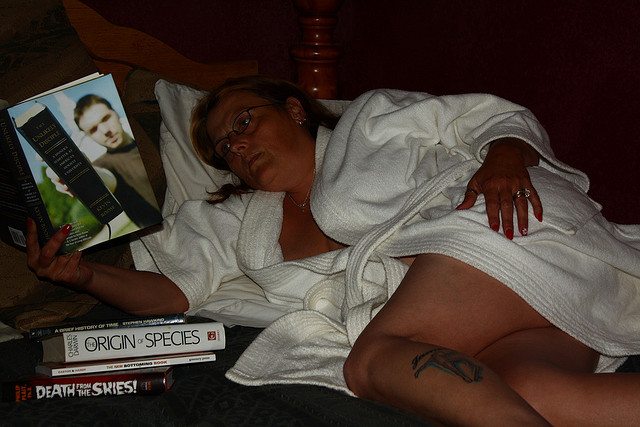

In [8]:
img = get_one_image()
image = Image.open(img)
display(image)

In [9]:
from transformers import AutoProcessor, LlavaForConditionalGeneration
from transformers import BitsAndBytesConfig
import torch

quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16
)


model_id = "llava-hf/llava-1.5-7b-hf"

processor = AutoProcessor.from_pretrained(model_id)
model = LlavaForConditionalGeneration.from_pretrained(model_id, quantization_config=quantization_config, device_map="auto")

processor_config.json:   0%|          | 0.00/173 [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/701 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/505 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json:   0%|          | 0.00/1.45k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.62M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/41.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/950 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/70.1k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.18G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

In [10]:
print(model)

LlavaForConditionalGeneration(
  (vision_tower): CLIPVisionModel(
    (vision_model): CLIPVisionTransformer(
      (embeddings): CLIPVisionEmbeddings(
        (patch_embedding): Conv2d(3, 1024, kernel_size=(14, 14), stride=(14, 14), bias=False)
        (position_embedding): Embedding(577, 1024)
      )
      (pre_layrnorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
      (encoder): CLIPEncoder(
        (layers): ModuleList(
          (0-23): 24 x CLIPEncoderLayer(
            (self_attn): CLIPSdpaAttention(
              (k_proj): Linear4bit(in_features=1024, out_features=1024, bias=True)
              (v_proj): Linear4bit(in_features=1024, out_features=1024, bias=True)
              (q_proj): Linear4bit(in_features=1024, out_features=1024, bias=True)
              (out_proj): Linear4bit(in_features=1024, out_features=1024, bias=True)
            )
            (layer_norm1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
            (mlp): CLIPMLP(
              (a

In [11]:
print(model.config)

LlavaConfig {
  "_attn_implementation_autoset": true,
  "_name_or_path": "llava-hf/llava-1.5-7b-hf",
  "architectures": [
    "LlavaForConditionalGeneration"
  ],
  "ignore_index": -100,
  "image_seq_length": 576,
  "image_token_index": 32000,
  "model_type": "llava",
  "multimodal_projector_bias": true,
  "pad_token_id": 32001,
  "projector_hidden_act": "gelu",
  "quantization_config": {
    "_load_in_4bit": true,
    "_load_in_8bit": false,
    "bnb_4bit_compute_dtype": "float16",
    "bnb_4bit_quant_storage": "uint8",
    "bnb_4bit_quant_type": "fp4",
    "bnb_4bit_use_double_quant": false,
    "llm_int8_enable_fp32_cpu_offload": false,
    "llm_int8_has_fp16_weight": false,
    "llm_int8_skip_modules": null,
    "llm_int8_threshold": 6.0,
    "load_in_4bit": true,
    "load_in_8bit": false,
    "quant_method": "bitsandbytes"
  },
  "text_config": {
    "_name_or_path": "lmsys/vicuna-7b-v1.5",
    "architectures": [
      "LlamaForCausalLM"
    ],
    "max_position_embeddings": 4096

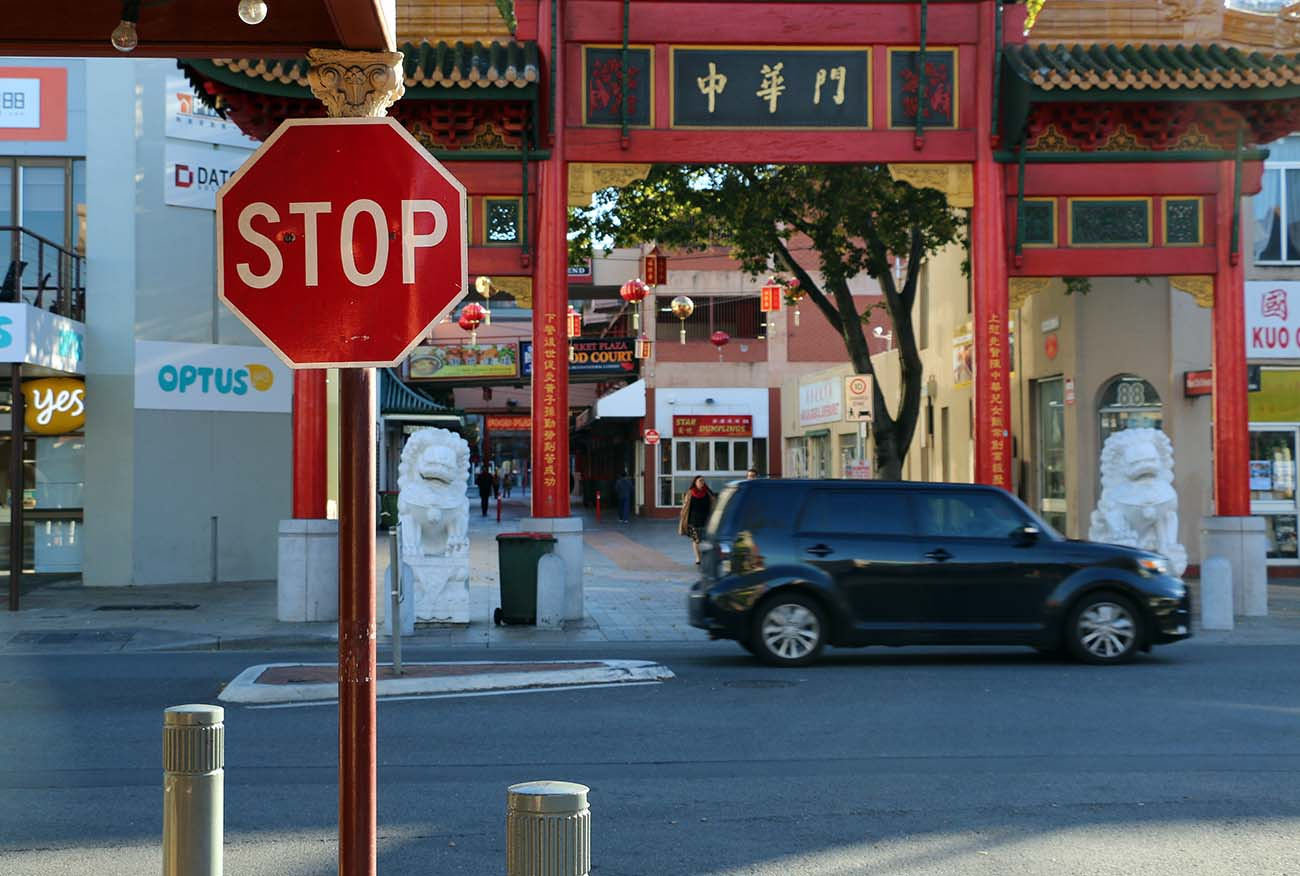

In [12]:
# prompt = "USER: <image>\nWhat's the content of the image? ASSISTANT:"
url = "https://www.ilankelman.org/stopsigns/australia.jpg"
image = Image.open(requests.get(url, stream=True).raw)
display(image)

In [13]:
prompt = "USER: <image>\nWhat's the content of the image? ASSISTANT:"
prompt_with_no_question = "USER: <image>\n ASSISTANT:"

device = "cuda" if torch.cuda.is_available() else "cpu"

inputs = processor(images=image, text=prompt, return_tensors="pt").to(device, torch.float16)
inputs_with_no_question = processor(images=image, text=prompt_with_no_question, return_tensors="pt").to(device, torch.float16)


# print(inputs) # input_ids, attention_mask, pixel_values
print(inputs.input_ids.shape, inputs.attention_mask.shape, inputs.pixel_values.shape)
print(inputs_with_no_question.input_ids.shape, inputs_with_no_question.attention_mask.shape, inputs_with_no_question.pixel_values.shape)
print(inputs.input_ids)
print(type(inputs.input_ids[0][0]), inputs.input_ids[0][0])

generate_ids = model.generate(**inputs, max_new_tokens=30)
print(processor.batch_decode(generate_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False)[0])

print(generate_ids.shape)

torch.Size([1, 597]) torch.Size([1, 597]) torch.Size([1, 3, 336, 336])
torch.Size([1, 588]) torch.Size([1, 588]) torch.Size([1, 3, 336, 336])
tensor([[    1,  3148,  1001, 29901, 29871, 32000, 32000, 32000, 32000, 32000,
         32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000,
         32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000,
         32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000,
         32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000,
         32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000,
         32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000,
         32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000,
         32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000,
         32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000,
         32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000, 320

In [14]:
prompt_test = "USER: <image>\nWhat's the content of the image? ASSISTANT:"
inputs_test = processor(images=image, text=prompt_test, return_tensors="pt").to(device, torch.float16)

print(inputs_test.input_ids.shape, inputs_test.attention_mask.shape, inputs_test.pixel_values.shape)
generate_ids = model.generate(**inputs_test, max_new_tokens=30)
print(processor.batch_decode(generate_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False)[0])


torch.Size([1, 597]) torch.Size([1, 597]) torch.Size([1, 3, 336, 336])
USER:  
What's the content of the image? ASSISTANT: The image features a stop sign on a street corner, with a car driving by on the street. There is also a statue of a lion nearby


In [15]:
vision_config = model.config.vision_config
image_input_size = vision_config.image_size
patch_size = vision_config.patch_size
print(image_input_size, patch_size, image_input_size/patch_size)
print(24*24)

336 14 24.0
576


In [16]:
image_outputs = model.vision_tower(inputs.pixel_values, output_hidden_states=True)
print(image_outputs.last_hidden_state.shape)


def get_image_features(model, inputs):
    image_features = model.get_image_features(
        pixel_values=inputs.pixel_values,
        vision_feature_layer=model.config.vision_feature_layer,
        vision_feature_select_strategy=model.config.vision_feature_select_strategy
    )
    return image_features
image_features = get_image_features(model, inputs)
print(image_features.shape)

torch.Size([1, 577, 1024])
torch.Size([1, 576, 4096])


In [17]:
def get_logits(image_feature, image_token="<image>"):
    batch, _, _ = image_feature.shape
    prompt_strings = [image_token]*batch
    text_inputs = processor.tokenizer(prompt_strings, return_tensors="pt")
    input_ids = text_inputs["input_ids"]
    
    inputs_embeds = model.get_input_embeddings()(input_ids)
    inputs_embeds, attention_mask, labels, position_ids = model._merge_input_ids_with_image_features(image_feature, inputs_embeds, input_ids, text_inputs.attention_mask, labels=None)
    
    outputs = model.language_model(
        attention_mask=attention_mask,
        position_ids=position_ids,
        inputs_embeds=inputs_embeds,
    )
    logits = outputs[0]
    
    return logits


def get_topk(logits, topk=5):
    topk_values, topk_indices = torch.topk(logits, topk, dim=-1)
    return topk_values, topk_indices




In [18]:
img_f = image_features[:,144:145,:]
img_f2 = torch.cat((img_f, img_f),0)
print(img_f.shape, img_f2.shape)

logits = get_logits(img_f2)
topk_values, topk_indices = get_topk(logits)
generate_ids = topk_indices[:,-1,:]
print(topk_indices)
next_tokens = processor.batch_decode(generate_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False)
print(next_tokens)

torch.Size([1, 1, 4096]) torch.Size([2, 1, 4096])
tensor([[[23196, 19838, 18627, 24366, 26077],
         [  360, 29892, 29889, 29949,  6093]],

        [[23196, 19838, 18627, 24366, 26077],
         [  360, 29892, 29889, 29949,  6093]]], device='cuda:1')
['D,.O THE', 'D,.O THE']


In [19]:
tokenizer = processor.tokenizer
vocab = tokenizer.get_vocab()
print(type(tokenizer.get_vocab()))
print(len(vocab))
print(tokenizer.convert_ids_to_tokens([29892, 29889,   491,   310,   304]))
print(tokenizer.convert_ids_to_tokens([322,  5214, 14603, 13814, 29892]))
print(tokenizer.convert_ids_to_tokens([360, 29892, 29889, 29949,  6093]))

print(tokenizer.decode([29892, 29889,   491,   310,   304], clean_up_tokenization_spaces=True))

<class 'dict'>
32002
[',', '.', '▁by', '▁of', '▁to']
['▁and', '▁building', '▁walls', '▁buildings', ',']
['▁D', ',', '.', 'O', '▁THE']
,. by of to


In [20]:
def normalize_token(token_list):
    normalized_token_list = []
    for token in token_list:
        if len(token)>1 and token[0] == '▁':
            normalized_token_list.append(token[1:])
        else:
            normalized_token_list.append(token)
    return normalized_token_list

In [21]:
def batch_generation(image):
    inputs = processor(images=image, text="", return_tensors="pt").to(device, torch.float16)
    image_features = get_image_features(model, inputs)
    image_features = torch.permute(image_features, (1, 0, 2))
    # print(image_features.shape)

    logits = get_logits(image_features)
    topk_values, topk_indices = get_topk(logits)
    generate_ids = topk_indices[:,-1,:]
    id_list = generate_ids.tolist()

    tokenizer = processor.tokenizer
    
    # next_tokens = processor.batch_decode(generate_ids)
    # print(next_tokens[74])
    next_tokens = [normalize_token(tokenizer.convert_ids_to_tokens(id)) for id in id_list]
    # print(next_tokens[74])
    return next_tokens


In [22]:
url = "https://www.ilankelman.org/stopsigns/australia.jpg"
image = Image.open(requests.get(url, stream=True).raw)
next_token = batch_generation(image)

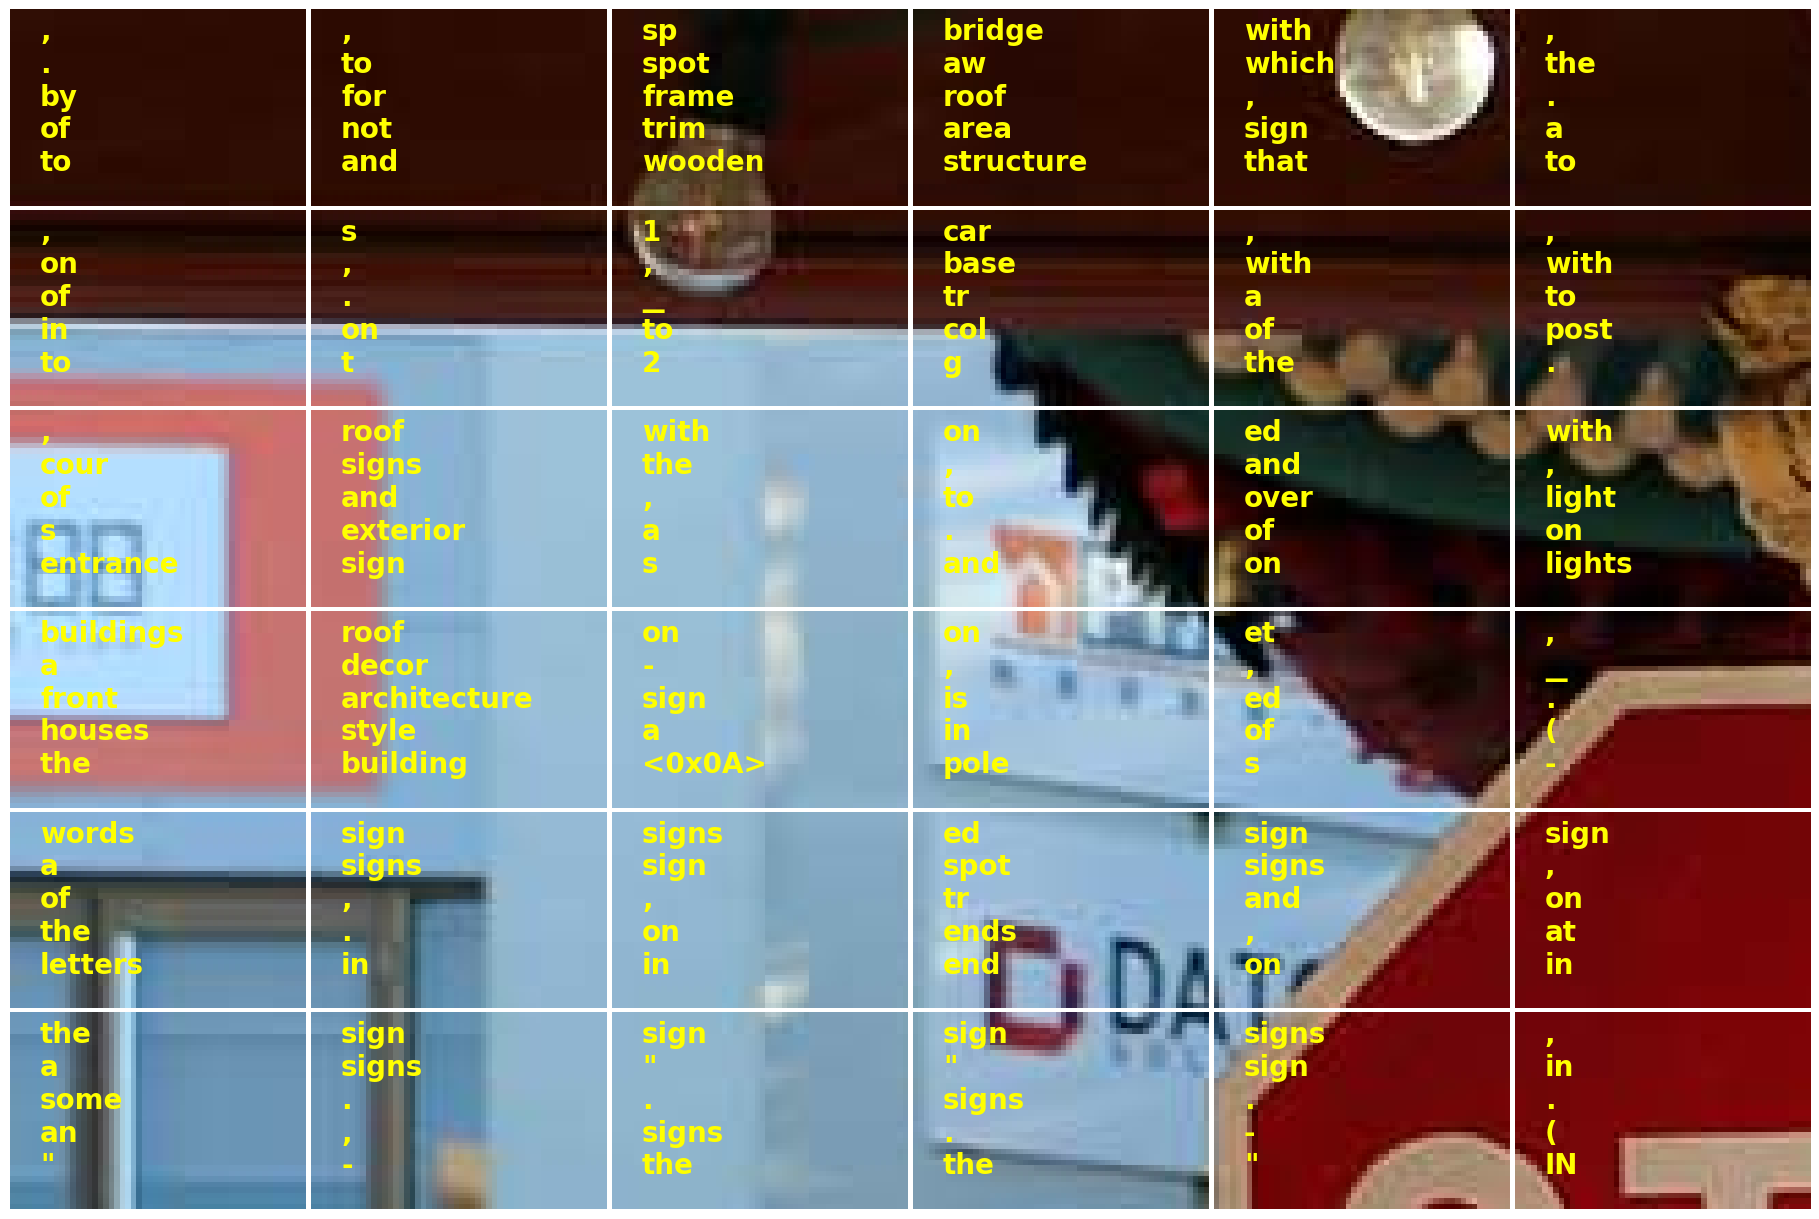

In [23]:
image_np = np.array(image)
height, width, _ = image_np.shape
step_height = height // (image_input_size//patch_size)
step_width = width // (image_input_size//patch_size)
# print(step_height*24, step_width*24)

sub_image_x = random.randint(0,3)
sub_image_y = random.randint(0,3)
# print(sub_image_x, sub_image_y)

sub_image_x = 0
sub_image_y = 0


step_x = sub_image_x*6*step_height
step_y = sub_image_y*6*step_width
# print(height, width)
# print(step_x, step_y)

fig, axs = plt.subplots(6, 6, figsize=(18, 12))
plt.subplots_adjust(left=0, right=1, top=1, bottom=0, wspace=0.02, hspace=0.02)
for x in range(6):
    for y in range(6):
        axs[x,y].imshow(image_np[step_x+x*step_height:step_x+(x+1)*step_height, step_y+y*step_width:step_y+(y+1)*step_width, :])
        axs[x,y].set_axis_off()
        feature_idx = (sub_image_x*6+x)*24 + (sub_image_y*6+y)
        # print(feature_idx)
        for i,s in enumerate(next_token[feature_idx]): 
        # for i,s in enumerate(next_token[feature_idx].split(' ')):
            axs[x,y].text(5, 5+i*6, s, fontsize=20, color='yellow', weight='bold')


plt.show()


In [24]:
def show_tokens_on_img(idx=-1):
    img = get_one_image(idx)
    image = Image.open(img)
    display(image)
    
    next_token = batch_generation(image)
    
    image_np = np.array(image)
    height, width, _ = image_np.shape
    print(height, width)
    step_height = height // (image_input_size//patch_size)
    step_width = width // (image_input_size//patch_size)
    # print(step_height, step_width)
    
    sub_image_x = random.randint(0,3)
    sub_image_y = random.randint(0,3)
    # print(sub_image_x, sub_image_y)
    
    sub_image_x = 0
    sub_image_y = 0

    fig, axs = plt.subplots(6, 6, figsize=(18, 12))
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0, wspace=0.02, hspace=0.02)
    for x in range(6):
        for y in range(6):
            axs[x,y].imshow(image_np[step_x+x*step_height:step_x+(x+1)*step_height, step_y+y*step_width:step_y+(y+1)*step_width, :])
            axs[x,y].set_axis_off()
            feature_idx = (sub_image_x*6+x)*24 + (sub_image_y*6+y)
            # print(feature_idx)
            for i,s in enumerate(next_token[feature_idx]): 
            # for i,s in enumerate(next_token[feature_idx].split(' ')):
                axs[x,y].text(0.1*step_width, (1+i)*(step_height/6), s, fontsize=20, color='yellow', weight='bold')

    plt.show()

choose index 3 from total 18783 images
/kaggle/input/mini-coco2014-dataset-for-image-captioning/Images/COCO_train2014_000000316443.jpg


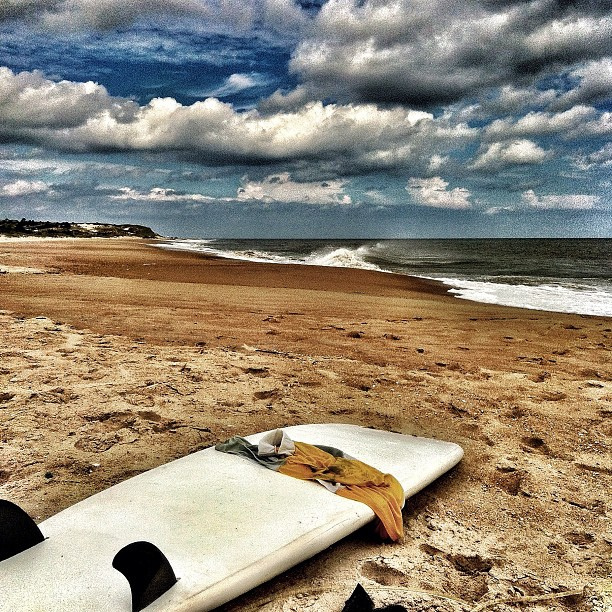

612 612


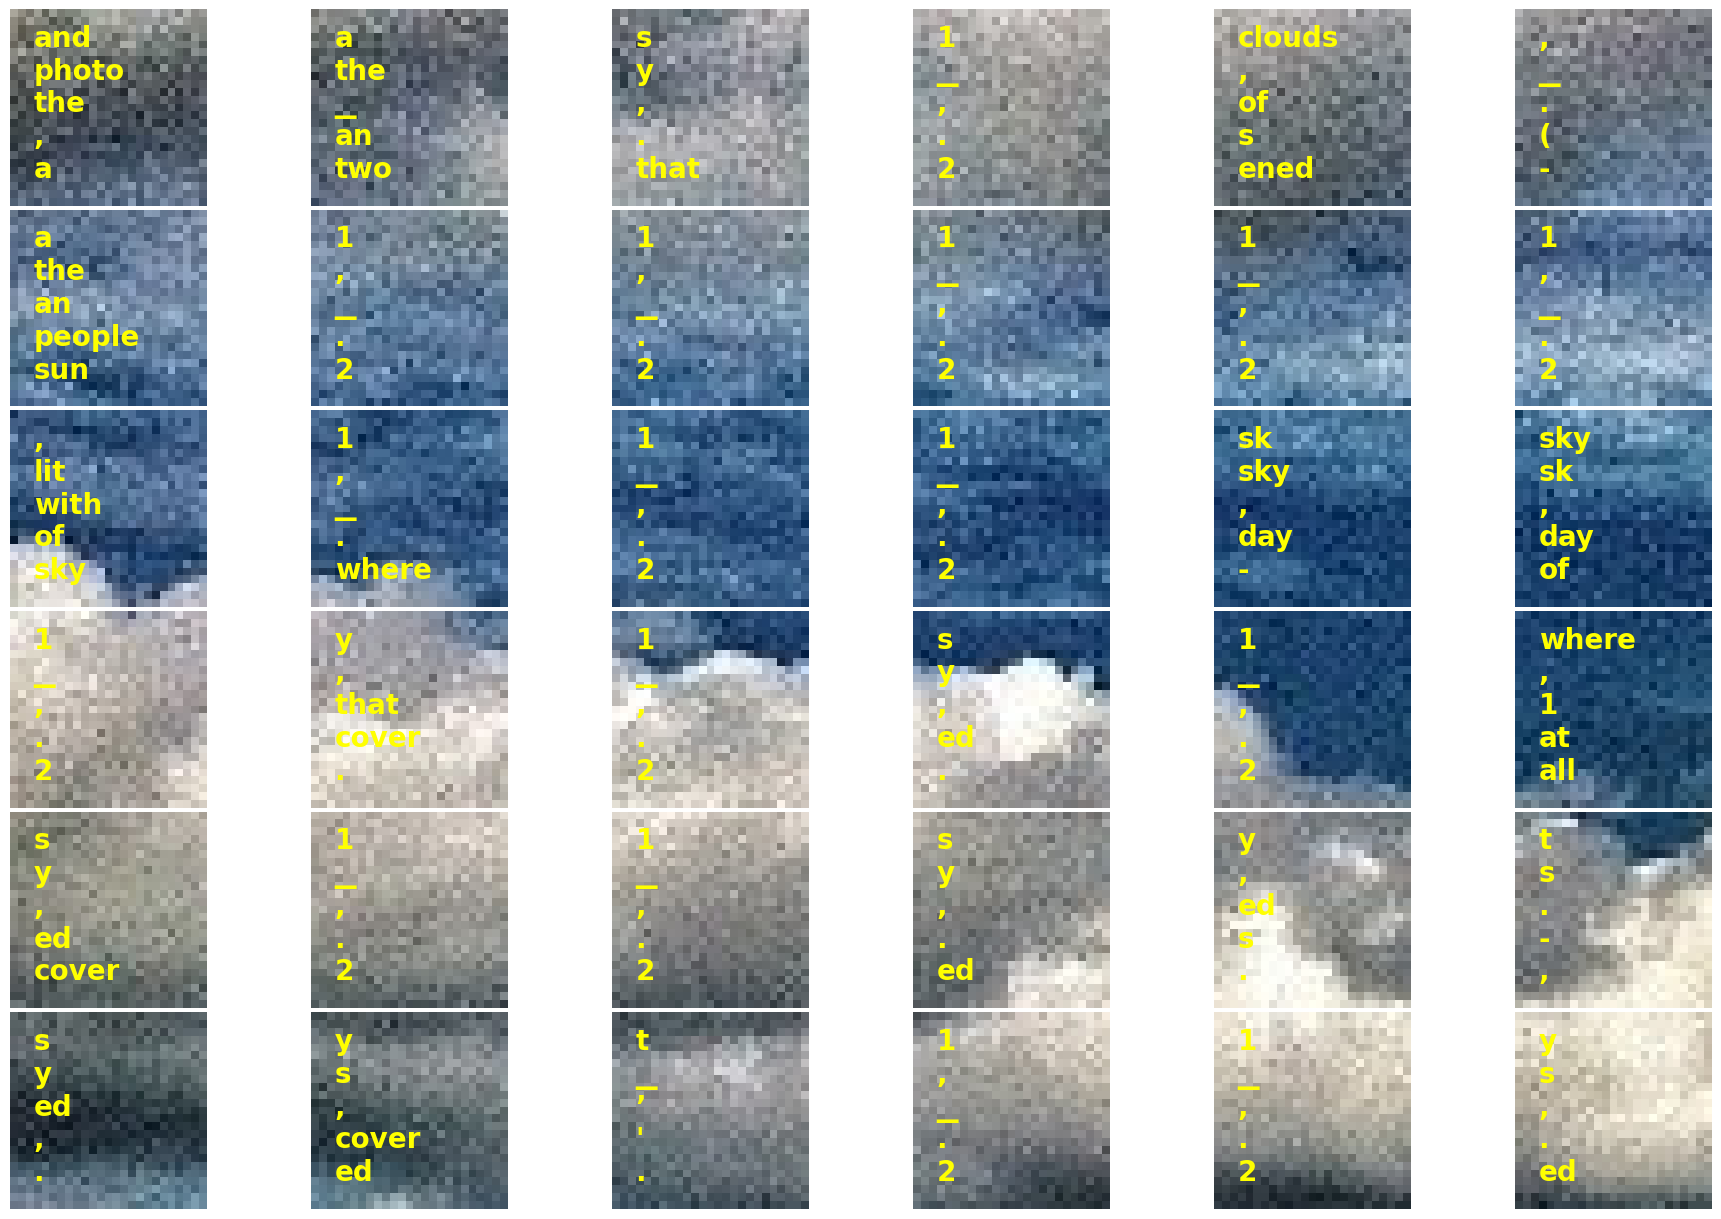

In [25]:
show_tokens_on_img(3)

In [26]:
# used for coloring patch with specific token
def get_generated_ids(image, k=20):
    inputs = processor(images=image, text="", return_tensors="pt").to(device, torch.float16)
    image_features = get_image_features(model, inputs)
    image_features = torch.permute(image_features, (1, 0, 2))
    # print(image_features.shape)

    logits = get_logits(image_features)
    topk_values, topk_indices = get_topk(logits, k)
    generate_ids = topk_indices[:,-1,:]
    # print(generate_ids.shape)
    return generate_ids

def most_frequent_id(generate_ids, k=30):
    unique_values, counts = torch.unique(generate_ids, return_counts=True)
    print(unique_values.shape)
    _, indices = torch.sort(counts, descending=True)
    sorted_unique_values = unique_values[indices]
    return sorted_unique_values[0:k]

def decode(generate_ids):
    id_list = generate_ids.tolist()
    tokenizer = processor.tokenizer
    tokens = normalize_token(tokenizer.convert_ids_to_tokens(id_list))
    token = tokenizer.convert_ids_to_tokens(id_list)
    return token

def get_token_id(token):
    tokenizer = processor.tokenizer
    ids = tokenizer.convert_tokens_to_ids(token)
    return ids

def get_mask(generated_ids, given_id):
    mask = torch.where(torch.isin(generated_ids, given_id), 1, 0)
    return mask

def patch_with_given_token(image, input_token, topk=30):
    input_token_id = get_token_id(input_token)
    generate_ids = get_generated_ids(image, k=topk)
    mask = get_mask(generate_ids, input_token_id)
    return mask.sum(dim=1)

In [27]:
generate_ids = get_generated_ids(image, k=50)
freq_ids = most_frequent_id(generate_ids, k=100)
freq_tokens = decode(freq_ids)
print(freq_tokens)

# test_token_id = torch.tensor([322,  5214, 14603, 13814, 29892])
# test_decode_token = decode(test_token_id)
# print(test_decode_token)
# test_encode_ids = get_token_id(test_decode_token)
# print(test_encode_ids)
# test_encode_ids = get_token_id(["and", "▁and"])
# print(test_encode_ids)

torch.Size([2429])
[',', '.', '▁and', '▁in', '▁on', '▁to', '▁with', '-', '▁at', '▁of', '▁a', '▁for', '▁that', '▁', '▁as', '▁or', '<0x0A>', '▁(', ':', '▁by', '▁the', '▁is', '▁which', '▁where', '▁from', 's', '▁was', '▁can', '▁out', ')', '▁two', '▁h', '▁d', '▁m', '▁c', '▁b', 'ed', '1', '2', '▁s', '▁have', '▁it', '▁if', '▁more', '3', '▁what', '▁over', '4', '8', '▁signs', '7', '▁k', '▁near', '▁along', '9', '5', '▁sign', '▁are', '6', '▁sh', '!', ';', '▁buildings', '▁S', '▁l', '▁when', '▁may', '▁street', '▁decor', '▁outside', '▁so', '▁all', '▁across', '0', '▁an', 'ing', '▁behind', '</s>', '▁t', '▁next', '▁building', '▁roof', '▁above', '▁painted', '▁front', '▁windows', '▁into', '▁business', '▁area', '▁without', '▁color', '▁symbol', '▁symbols', '▁this', '▁any', '▁before', '▁st', '▁through', '▁letters', 'y']


In [28]:
def filter_token(token):
    tag_set = {"NN", "NNS", "NNP"}
    normalized_token = normalize_token(token)
    tagged_token = nltk.pos_tag(normalized_token)
    filtered_token = []
    # print(tagged_token)

    for (tk, tag) in tagged_token:
        if len(tk) > 2 and tk.isalnum() and tag in tag_set:
            filtered_token.append(tk)

    return filtered_token

In [29]:
filtered_token = filter_token(freq_tokens)
print(len(filtered_token), filtered_token)

12 ['signs', 'sign', 'buildings', 'ing', 'building', 'roof', 'front', 'business', 'area', 'color', 'symbol', 'letters']


In [30]:
def show_patch_seg(image, token, topk=10):
    mask = patch_with_given_token(image, token, topk).reshape((24,24)).cpu().numpy()
    
    mask2 = np.repeat(mask, patch_size, axis=0)
    mask2 = np.repeat(mask2, patch_size, axis=1)
    
    fig2, ax2 = plt.subplots(1)
    ax2.imshow(image.resize((image_input_size, image_input_size)), alpha=1.0)
    colors = ["white", "yellow"]
    cmap = plt.cm.colors.ListedColormap(colors)
    ax2.imshow(mask2*255, cmap=cmap, alpha=0.6)
    ax2.set_axis_off()
    plt.show()

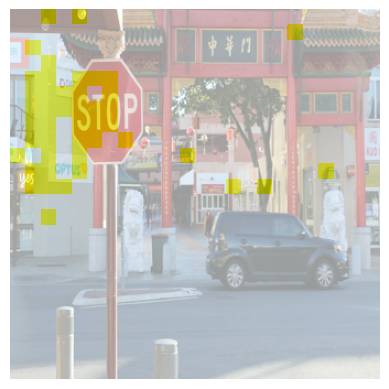

In [31]:
show_patch_seg(image, "▁sign", topk=10)

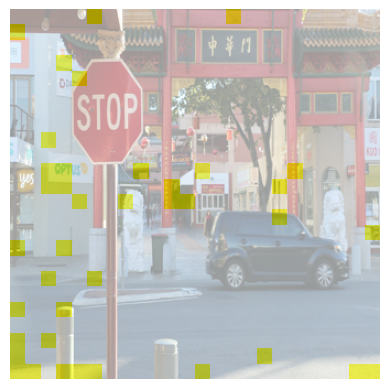

In [32]:
show_patch_seg(image, "▁street", topk=20)